In [1]:
import numpy as np
import matplotlib.pyplot as plt

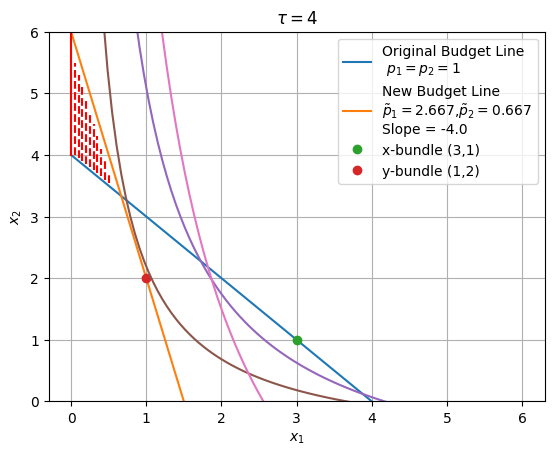

In [270]:
p1 = 1
p2 = 1
tau = 4
b = p1*tau
x1 = np.linspace(0,6,100)

def x2(x1,p1,p2,tau): 
    return (tau-x1*p1)/p2

#a
plt.plot(x1,x2(x1,p1,p2,tau),label="Original Budget Line\n $p_1=p_2=1$")
#b 
eps = 1e-3
p1_t = 8/3
p2_t = 2/3
s = p1_t/p2_t


plt.plot(x1,x2(x1,p1_t,p2_t,tau),label=fr"New Budget Line"+"\n"+ fr"$\tilde{{p}}_1=${round(p1_t,3)},$\tilde{{p}}_2=${round(p2_t,3)}"+"\n"+fr"Slope = {-round(s,3)}")
plt.plot(3,1,'o',label="x-bundle (3,1)")
plt.plot(1,2,'o',label="y-bundle (1,2)")

plt.plot([0,0],[4,6],'r')
for i in range(11):
    plt.plot([0.05*(i+1),0.05*(i+1)],[4-0.05*i,5.5-0.2*i],'r--')


for i in range(3):
    plt.plot(x1,x2(x1,np.random.uniform(4/5+eps,2),np.random.uniform(0+eps,8/5-eps),tau)/(x1+eps))

plt.legend()
plt.title(fr"$\tau=4$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.ylim((0,6))
plt.grid()
plt.show()





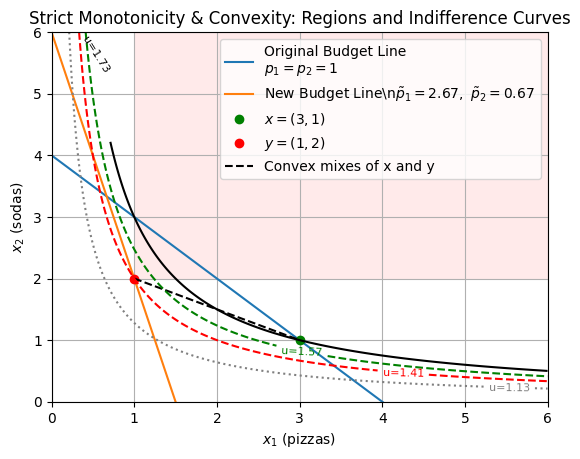

In [273]:
import numpy as np
import matplotlib.pyplot as plt

# --- Setup ---
p1, p2, tau = 1, 1, 4
x1 = np.linspace(0,6,200)

def x2_budget(x1,p1,p2,tau): 
    return (tau-x1*p1)/p2

# --- Bundles ---
x = np.array([3,1])
y = np.array([1,2])

# --- Prices for new budget line ---
p1_t, p2_t = 8/3, 2/3
slope_t = -p1_t/p2_t

# --- Plot budget lines ---
plt.plot(x1, x2_budget(x1,p1,p2,tau), label="Original Budget Line\n$p_1=p_2=1$")
plt.plot(x1, x2_budget(x1,p1_t,p2_t,tau),
         label=fr"New Budget Line\n$\tilde p_1={p1_t:.2f},\ \tilde p_2={p2_t:.2f}$")

# --- Mark bundles ---
plt.plot(*x,'go',label=r"$x=(3,1)$")
plt.plot(*y,'ro',label=r"$y=(1,2)$")

# --- Region strictly preferred to y (strict monotonicity) ---
X1, X2 = np.meshgrid(np.linspace(0,6,300), np.linspace(0,6,300))
preferred_region = (X1 > y[0]) & (X2 > y[1])
plt.contourf(X1, X2, preferred_region, levels=[0.5,1], colors=['#ffd6d6'], alpha=0.5)

# --- Convex combination line between x and y ---
lambdas = np.linspace(0,1,50)
mix_x = lambdas*x[0] + (1-lambdas)*y[0]
mix_y = lambdas*x[1] + (1-lambdas)*y[1]
plt.plot(mix_x, mix_y, 'k--', label="Convex mixes of x and y")

# --- Indifference curves (Cobb–Douglas) ---
def u(x1, x2): 
    return np.sqrt(x1 * x2)

# Utility levels through x and y
u_y = u(*y)
u_x = u(*x)
u_levels = [u_y*0.8, u_y, (u_x+u_y)/2, u_x]

contours = plt.contour(X1, X2, u(X1,X2), levels=u_levels, colors=['gray','r','g','black'], linestyles=[':','--','--','-'])
plt.clabel(contours, inline=True, fontsize=8, fmt=lambda v: f"u={v:.2f}")

# --- Labels & layout ---
plt.legend()
plt.title(r"Strict Monotonicity & Convexity: Regions and Indifference Curves")
plt.xlabel(r"$x_1$ (pizzas)")
plt.ylabel(r"$x_2$ (sodas)")
plt.xlim(0,6)
plt.ylim(0,6)
plt.grid(True)
plt.show()
